In [1]:
import numpy as np
import pandas as pd
import os
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import json

# preprocess and making data

## make instances dictionary

In [4]:
DATA_PATH = './Artificial_blinks'
instance_names = np.array(os.listdir(DATA_PATH))
print(type(instance_names))
print(len(instance_names))
print(instance_names)

instances_dict = {}
for i, j in enumerate(instance_names):
  instances_dict[i] = j
print(instances_dict)

<class 'numpy.ndarray'>
172
['HF008' 'HF008_V2' 'HF009' 'HF009_V2' 'HF010' 'HF010_V2' 'HF011'
 'HF011_V2' 'HF012' 'HF012_V2' 'HF013' 'HF014' 'HF015' 'HF015_V2' 'HF016'
 'HF016_V2' 'HF017' 'HF018' 'HF019' 'HF020' 'HF021' 'HF022' 'HF023'
 'HF024' 'HF026' 'HF026_V2' 'HF027' 'HF027_V2' 'HF028' 'HF029' 'HF030_V2'
 'HF031' 'HF031_V2' 'HF032' 'HF032_V2' 'HF033' 'HF033_V2' 'HG001'
 'HG001_V2' 'HG002' 'HG002_V2' 'HG003' 'HG003_V2' 'HG004' 'HG004_V2'
 'HG005' 'HG005_V2' 'HG005_V3' 'HG006_V2' 'HG008' 'HG008_V2' 'HG009'
 'HG009_V2' 'HG010' 'HG010_V2' 'HG011' 'HG011_V2' 'HG012_V2' 'HG014_V2'
 'HG015' 'HG015_V2' 'HG016' 'HG016_V2' 'HG017' 'HG017_V2' 'HG018'
 'HG018_V2' 'HG019' 'HG019_V2' 'HG021' 'HG021_V2' 'HG022' 'HG022_V2'
 'HG023' 'HG023_V2' 'HG024' 'HG024_V2' 'HG025' 'HG025_V2' 'HG026' 'HG027'
 'HG027_V2' 'HG028' 'HG028_V2' 'HG029' 'HG029_V2' 'HG030' 'HG030_V2'
 'HG031' 'HG031_V2' 'HG032' 'HG032_V2' 'HG033' 'HG034' 'HG034_V2' 'HG035'
 'HG035_V2' 'HG036_V2' 'HG037' 'HG037_V2' 'HG038' 'HG038_V2' '

In [5]:
NEW_DATA_PATH = 'instances_dict.json'
with open(NEW_DATA_PATH, 'w') as f:
    json.dump(instances_dict, f)

## utility functions

In [7]:
def mask_null_values(signal, event):
  signal_length = len(signal)

  for index, row in event.iterrows():
      if row['value'] == 2:
          start_index = row['start']
          end_index = row['end']

          extended_start_index = max(0, start_index - 5)
          extended_end_index = min(signal_length - 1, end_index + 5)

          signal[extended_start_index:extended_end_index + 1] = [np.nan] * (extended_end_index - extended_start_index + 1)

  return signal

In [8]:
def mask_Artificail_null_values(signal, event):
  signal_length = len(signal)

  for index, row in event.iterrows():
      if row['value'] == 5:
          start_index = row['start']
          end_index = row['end']

          signal[start_index:end_index + 1] = [np.nan] 

  return signal

In [9]:
def align_length(signal):
    if len(signal) < 15000:
        num = 15000 - len(signal)
        # signal = np.pad(signal, (0, num), mode='edge')
        signal = np.pad(signal, (0, num), mode='constant', constant_values=None)
    elif len(signal) >= 15000:
        signal = signal[:15000]
    return signal

In [10]:
def remove_outlier(signal):
    mean = np.nanmean(signal)
    std = np.nanstd(signal)
    threshold = mean + 2 * std
    
    # Clamp values above positive threshold
    signal = np.where(signal > threshold, threshold, signal)
    
    # Clamp values below negative threshold
    signal = np.where(signal < -threshold, -threshold, signal)
    
    return signal

## SmoothPur_1_4

In [12]:
SmoothPur_1_4 = []
ex_1 = ['SmoothPur_1', 'SmoothPur_2', 'SmoothPur_3', 'SmoothPur_4']

for i in tqdm(instance_names, desc='extracting data_SmoothPur_1_4', total=len(instance_names)):
  instance = []
  for j in ex_1:
    path = os.path.join(DATA_PATH, i, j)

    sigL = pd.read_csv(path + '/LTS.dat', header=None, names=['X-axis', 'Y-axis'])
    sigR = pd.read_csv(path + '/RTS.dat', header=None, names=['X-axis', 'Y-axis'])
    eventL = pd.read_csv(path + '/LEvent.dat', header=None, names=['start', 'end', 'value'])
    eventR = pd.read_csv(path + '/REvent.dat', header=None, names=['start', 'end', 'value'])
    target = pd.read_csv(path + '/target.dat', header=None, names=['X-axis', 'Y-axis'])

    Lx = sigL.iloc[: , 0].tolist()
    np_Lx = np.array(Lx)
    np_Lx = mask_null_values(np_Lx, eventL)
    np_Lx = align_length(np_Lx)
    np_Lx = remove_outlier(np_Lx)

    Rx = sigR.iloc[: , 0].tolist()
    np_Rx = np.array(Rx)
    np_Rx = mask_null_values(np_Rx, eventR)
    np_Rx = align_length(np_Rx)
    np_Rx = remove_outlier(np_Rx)

    targetx = target.iloc[: , 0].tolist()
    np_targetx = np.array(targetx)
    np_targetx = align_length(np_targetx)

    result = [np_Lx, np_Rx, np_targetx]
    instance.append(result)
  SmoothPur_1_4.append(instance)
SmoothPur_1_4 = np.array(SmoothPur_1_4)

extracting data_SmoothPur_1_4:   0%|          | 0/172 [00:00<?, ?it/s]

In [13]:
SmoothPur_1_4_Ar = []
ex_1 = ['SmoothPur_1', 'SmoothPur_2', 'SmoothPur_3', 'SmoothPur_4']

for i in tqdm(instance_names, desc='extracting data_SmoothPur_1_4', total=len(instance_names)):
  instance = []
  for j in ex_1:
    path = os.path.join(DATA_PATH, i, j)

    sigL = pd.read_csv(path + '/LTS.dat', header=None, names=['X-axis', 'Y-axis'])
    sigR = pd.read_csv(path + '/RTS.dat', header=None, names=['X-axis', 'Y-axis'])
    eventL = pd.read_csv(path + '/LEvent.dat', header=None, names=['start', 'end', 'value'])
    eventR = pd.read_csv(path + '/REvent.dat', header=None, names=['start', 'end', 'value'])
    target = pd.read_csv(path + '/target.dat', header=None, names=['X-axis', 'Y-axis'])

    Lx = sigL.iloc[: , 0].tolist()
    np_Lx = np.array(Lx)
    np_Lx = mask_Artificail_null_values(np_Lx, eventL)
    np_Lx = align_length(np_Lx)
    np_Lx = remove_outlier(np_Lx)

    Rx = sigR.iloc[: , 0].tolist()
    np_Rx = np.array(Rx)
    np_Rx = mask_Artificail_null_values(np_Rx, eventR)
    np_Rx = align_length(np_Rx)
    np_Rx = remove_outlier(np_Rx)

    targetx = target.iloc[: , 0].tolist()
    np_targetx = np.array(targetx)
    np_targetx = align_length(np_targetx)

    result = [np_Lx, np_Rx, np_targetx]
    instance.append(result)
  SmoothPur_1_4_Ar.append(instance)
SmoothPur_1_4_Ar = np.array(SmoothPur_1_4_Ar)

extracting data_SmoothPur_1_4:   0%|          | 0/172 [00:00<?, ?it/s]

In [14]:
np.save('Artificial_data/SmoothPur_1_4', SmoothPur_1_4)
np.save('Artificial_data/SmoothPur_1_4_Ar', SmoothPur_1_4_Ar)

In [15]:
print(len(SmoothPur_1_4))
print(type(SmoothPur_1_4))
print(SmoothPur_1_4.shape)

172
<class 'numpy.ndarray'>
(172, 4, 3, 15000)


In [16]:
print(len(SmoothPur_1_4_Ar))
print(type(SmoothPur_1_4_Ar))
print(SmoothPur_1_4_Ar.shape)

172
<class 'numpy.ndarray'>
(172, 4, 3, 15000)


## SmoothPur_5_8

In [18]:
SmoothPur_5_8 = []
ex_2 = ['SmoothPur_5', 'SmoothPur_6', 'SmoothPur_7', 'SmoothPur_8']

for i in tqdm(instance_names, desc='extracting data_SmoothPur_5_8', total=len(instance_names)):
  instance = []
  for j in ex_2:
    path = os.path.join(DATA_PATH, i, j)

    sigL = pd.read_csv(path + '/LTS.dat', header=None, names=['X-axis', 'Y-axis'])
    sigR = pd.read_csv(path + '/RTS.dat', header=None, names=['X-axis', 'Y-axis'])
    eventL = pd.read_csv(path + '/LEvent.dat', header=None, names=['start', 'end', 'value'])
    eventR = pd.read_csv(path + '/REvent.dat', header=None, names=['start', 'end', 'value'])
    target = pd.read_csv(path + '/target.dat', header=None, names=['X-axis', 'Y-axis'])

    Ly = sigL.iloc[: , 1].tolist()
    np_Ly = np.array(Ly)
    np_Ly = mask_null_values(np_Ly, eventL)
    np_Ly = align_length(np_Ly)
    np_Ly = remove_outlier(np_Ly)

    Ry = sigR.iloc[: , 1].tolist()
    np_Ry = np.array(Ry)
    np_Ry = mask_null_values(np_Ry, eventR)
    np_Ry = align_length(np_Ry)
    np_Ry = remove_outlier(np_Ry)

    targety = target.iloc[: , 1].tolist()
    np_targety = np.array(targety)
    np_targety = align_length(np_targety)

    result = [np_Ly, np_Ry, np_targety]
    instance.append(result)
  SmoothPur_5_8.append(instance)
SmoothPur_5_8 = np.array(SmoothPur_5_8)

extracting data_SmoothPur_5_8:   0%|          | 0/172 [00:00<?, ?it/s]

In [19]:
SmoothPur_5_8_Ar = []
ex_2 = ['SmoothPur_5', 'SmoothPur_6', 'SmoothPur_7', 'SmoothPur_8']

for i in tqdm(instance_names, desc='extracting data_SmoothPur_5_8', total=len(instance_names)):
  instance = []
  for j in ex_2:
    path = os.path.join(DATA_PATH, i, j)

    sigL = pd.read_csv(path + '/LTS.dat', header=None, names=['X-axis', 'Y-axis'])
    sigR = pd.read_csv(path + '/RTS.dat', header=None, names=['X-axis', 'Y-axis'])
    eventL = pd.read_csv(path + '/LEvent.dat', header=None, names=['start', 'end', 'value'])
    eventR = pd.read_csv(path + '/REvent.dat', header=None, names=['start', 'end', 'value'])
    target = pd.read_csv(path + '/target.dat', header=None, names=['X-axis', 'Y-axis'])

    Ly = sigL.iloc[: , 1].tolist()
    np_Ly = np.array(Ly)
    np_Ly = mask_Artificail_null_values(np_Ly, eventL)
    np_Ly = align_length(np_Ly)
    np_Ly = remove_outlier(np_Ly)

    Ry = sigR.iloc[: , 1].tolist()
    np_Ry = np.array(Ry)
    np_Ry = mask_Artificail_null_values(np_Ry, eventR)
    np_Ry = align_length(np_Ry)
    np_Ry = remove_outlier(np_Ry)

    targety = target.iloc[: , 1].tolist()
    np_targety = np.array(targety)
    np_targety = align_length(np_targety)

    result = [np_Ly, np_Ry, np_targety]
    instance.append(result)
  SmoothPur_5_8_Ar.append(instance)
SmoothPur_5_8_Ar = np.array(SmoothPur_5_8_Ar)

extracting data_SmoothPur_5_8:   0%|          | 0/172 [00:00<?, ?it/s]

In [20]:
np.save('Artificial_data/SmoothPur_5_8', SmoothPur_5_8)
np.save('Artificial_data/SmoothPur_5_8_Ar', SmoothPur_5_8_Ar)

In [21]:
print(len(SmoothPur_5_8))
print(type(SmoothPur_5_8))
print(SmoothPur_5_8.shape)

172
<class 'numpy.ndarray'>
(172, 4, 3, 15000)


In [22]:
print(len(SmoothPur_5_8_Ar))
print(type(SmoothPur_5_8_Ar))
print(SmoothPur_5_8_Ar.shape)

172
<class 'numpy.ndarray'>
(172, 4, 3, 15000)


## SmoothPur_9_10

In [24]:
SmoothPur_9_10 = []
ex_3 = ['SmoothPur_9', 'SmoothPur_10']

for i in tqdm(instance_names, desc='extracting data_SmoothPur_9_10', total=len(instance_names)):
  instance = []
  for j in ex_3:
    path = os.path.join(DATA_PATH, i, j)

    sigL = pd.read_csv(path + '/LTS.dat', header=None, names=['X-axis', 'Y-axis'])
    sigR = pd.read_csv(path + '/RTS.dat', header=None, names=['X-axis', 'Y-axis'])
    eventL = pd.read_csv(path + '/LEvent.dat', header=None, names=['start', 'end', 'value'])
    eventR = pd.read_csv(path + '/REvent.dat', header=None, names=['start', 'end', 'value'])
    target = pd.read_csv(path + '/target.dat', header=None, names=['X-axis', 'Y-axis'])

    Lx = sigL.iloc[: , 0].tolist()
    Ly = sigL.iloc[: , 1].tolist()
    np_Lx = np.array(Lx)
    np_Ly = np.array(Ly)
    np_Lx = mask_null_values(np_Lx, eventL)
    np_Ly = mask_null_values(np_Ly, eventL)
    np_Lx = align_length(np_Lx)
    np_Ly = align_length(np_Ly)
    np_Lx = remove_outlier(np_Lx)
    np_Ly = remove_outlier(np_Ly)

    Rx = sigR.iloc[: , 0].tolist()
    Ry = sigR.iloc[: , 1].tolist()
    np_Rx = np.array(Rx)
    np_Ry = np.array(Ry)
    np_Rx = mask_null_values(np_Rx, eventR)
    np_Ry = mask_null_values(np_Ry, eventR)
    np_Rx = align_length(np_Rx)
    np_Ry = align_length(np_Ry)
    np_Rx = remove_outlier(np_Rx)
    np_Ry = remove_outlier(np_Ry)

    targetx = target.iloc[: , 0].tolist()
    targety = target.iloc[: , 1].tolist()
    np_targetx = np.array(targetx)
    np_targety = np.array(targety)
    np_targetx = align_length(np_targetx)
    np_targety = align_length(np_targety)

    result = [[np_Lx, np_Rx], [np_Ly, np_Ry], [np_targetx, np_targety]]
    instance.append(result)
  SmoothPur_9_10.append(instance)
SmoothPur_9_10 = np.array(SmoothPur_9_10)

extracting data_SmoothPur_9_10:   0%|          | 0/172 [00:00<?, ?it/s]

In [25]:
SmoothPur_9_10_Ar = []
ex_3 = ['SmoothPur_9', 'SmoothPur_10']

for i in tqdm(instance_names, desc='extracting data_SmoothPur_9_10', total=len(instance_names)):
  instance = []
  for j in ex_3:
    path = os.path.join(DATA_PATH, i, j)

    sigL = pd.read_csv(path + '/LTS.dat', header=None, names=['X-axis', 'Y-axis'])
    sigR = pd.read_csv(path + '/RTS.dat', header=None, names=['X-axis', 'Y-axis'])
    eventL = pd.read_csv(path + '/LEvent.dat', header=None, names=['start', 'end', 'value'])
    eventR = pd.read_csv(path + '/REvent.dat', header=None, names=['start', 'end', 'value'])
    target = pd.read_csv(path + '/target.dat', header=None, names=['X-axis', 'Y-axis'])

    Lx = sigL.iloc[: , 0].tolist()
    Ly = sigL.iloc[: , 1].tolist()
    np_Lx = np.array(Lx)
    np_Ly = np.array(Ly)
    np_Lx = mask_Artificail_null_values(np_Lx, eventL)
    np_Ly = mask_Artificail_null_values(np_Ly, eventL)
    np_Lx = align_length(np_Lx)
    np_Ly = align_length(np_Ly)
    np_Lx = remove_outlier(np_Lx)
    np_Ly = remove_outlier(np_Ly)

    Rx = sigR.iloc[: , 0].tolist()
    Ry = sigR.iloc[: , 1].tolist()
    np_Rx = np.array(Rx)
    np_Ry = np.array(Ry)
    np_Rx = mask_Artificail_null_values(np_Rx, eventR)
    np_Ry = mask_Artificail_null_values(np_Ry, eventR)
    np_Rx = align_length(np_Rx)
    np_Ry = align_length(np_Ry)
    np_Rx = remove_outlier(np_Rx)
    np_Ry = remove_outlier(np_Ry)

    targetx = target.iloc[: , 0].tolist()
    targety = target.iloc[: , 1].tolist()
    np_targetx = np.array(targetx)
    np_targety = np.array(targety)
    np_targetx = align_length(np_targetx)
    np_targety = align_length(np_targety)

    result = [[np_Lx, np_Rx], [np_Ly, np_Ry], [np_targetx, np_targety]]
    instance.append(result)
  SmoothPur_9_10_Ar.append(instance)
SmoothPur_9_10_Ar = np.array(SmoothPur_9_10_Ar)

extracting data_SmoothPur_9_10:   0%|          | 0/172 [00:00<?, ?it/s]

In [26]:
np.save('Artificial_data/SmoothPur_9_10', SmoothPur_9_10)
np.save('Artificial_data/SmoothPur_9_10_Ar', SmoothPur_9_10_Ar)

In [27]:
print(len(SmoothPur_9_10))
print(type(SmoothPur_9_10))
print(SmoothPur_9_10.shape)

172
<class 'numpy.ndarray'>
(172, 2, 3, 2, 15000)


In [28]:
print(len(SmoothPur_9_10_Ar))
print(type(SmoothPur_9_10_Ar))
print(SmoothPur_9_10_Ar.shape)

172
<class 'numpy.ndarray'>
(172, 2, 3, 2, 15000)


## SmoothPur_11_12

In [30]:
SmoothPur_11_12 = []
ex_4 = ['SmoothPur_11', 'SmoothPur_12']

for i in tqdm(instance_names, desc='extracting data_SmoothPur_11_12', total=len(instance_names)):
  instance = []
  for j in ex_4:
    path = os.path.join(DATA_PATH, i, j)

    sigL = pd.read_csv(path + '/LTS.dat', header=None, names=['X-axis', 'Y-axis'])
    sigR = pd.read_csv(path + '/RTS.dat', header=None, names=['X-axis', 'Y-axis'])
    eventL = pd.read_csv(path + '/LEvent.dat', header=None, names=['start', 'end', 'value'])
    eventR = pd.read_csv(path + '/REvent.dat', header=None, names=['start', 'end', 'value'])
    target = pd.read_csv(path + '/target.dat', header=None, names=['X-axis', 'Y-axis'])

    Lx = sigL.iloc[: , 0].tolist()
    Ly = sigL.iloc[: , 1].tolist()
    np_Lx = np.array(Lx)
    np_Ly = np.array(Ly)
    np_Lx = mask_null_values(np_Lx, eventL)
    np_Ly = mask_null_values(np_Ly, eventL)
    np_Lx = align_length(np_Lx)
    np_Ly = align_length(np_Ly)
    np_Lx = remove_outlier(np_Lx)
    np_Ly = remove_outlier(np_Ly)

    Rx = sigR.iloc[: , 0].tolist()
    Ry = sigR.iloc[: , 1].tolist()
    np_Rx = np.array(Rx)
    np_Ry = np.array(Ry)
    np_Rx = mask_null_values(np_Rx, eventR)
    np_Ry = mask_null_values(np_Ry, eventR)
    np_Rx = align_length(np_Rx)
    np_Ry = align_length(np_Ry)
    np_Rx = remove_outlier(np_Rx)
    np_Ry = remove_outlier(np_Ry)

    targetx = target.iloc[: , 0].tolist()
    targety = target.iloc[: , 1].tolist()
    np_targetx = np.array(targetx)
    np_targety = np.array(targety)
    np_targetx = align_length(np_targetx)
    np_targety = align_length(np_targety)

    result = [[np_Lx, np_Rx], [np_Ly, np_Ry], [np_targetx, np_targety]]
    instance.append(result)
  SmoothPur_11_12.append(instance)
SmoothPur_11_12 = np.array(SmoothPur_11_12)

extracting data_SmoothPur_11_12:   0%|          | 0/172 [00:00<?, ?it/s]

In [31]:
SmoothPur_11_12_Ar = []
ex_4 = ['SmoothPur_11', 'SmoothPur_12']

for i in tqdm(instance_names, desc='extracting data_SmoothPur_11_12', total=len(instance_names)):
  instance = []
  for j in ex_4:
    path = os.path.join(DATA_PATH, i, j)

    sigL = pd.read_csv(path + '/LTS.dat', header=None, names=['X-axis', 'Y-axis'])
    sigR = pd.read_csv(path + '/RTS.dat', header=None, names=['X-axis', 'Y-axis'])
    eventL = pd.read_csv(path + '/LEvent.dat', header=None, names=['start', 'end', 'value'])
    eventR = pd.read_csv(path + '/REvent.dat', header=None, names=['start', 'end', 'value'])
    target = pd.read_csv(path + '/target.dat', header=None, names=['X-axis', 'Y-axis'])

    Lx = sigL.iloc[: , 0].tolist()
    Ly = sigL.iloc[: , 1].tolist()
    np_Lx = np.array(Lx)
    np_Ly = np.array(Ly)
    np_Lx = mask_Artificail_null_values(np_Lx, eventL)
    np_Ly = mask_Artificail_null_values(np_Ly, eventL)
    np_Lx = align_length(np_Lx)
    np_Ly = align_length(np_Ly)
    np_Lx = remove_outlier(np_Lx)
    np_Ly = remove_outlier(np_Ly)

    Rx = sigR.iloc[: , 0].tolist()
    Ry = sigR.iloc[: , 1].tolist()
    np_Rx = np.array(Rx)
    np_Ry = np.array(Ry)
    np_Rx = mask_Artificail_null_values(np_Rx, eventR)
    np_Ry = mask_Artificail_null_values(np_Ry, eventR)
    np_Rx = align_length(np_Rx)
    np_Ry = align_length(np_Ry)
    np_Rx = remove_outlier(np_Rx)
    np_Ry = remove_outlier(np_Ry)

    targetx = target.iloc[: , 0].tolist()
    targety = target.iloc[: , 1].tolist()
    np_targetx = np.array(targetx)
    np_targety = np.array(targety)
    np_targetx = align_length(np_targetx)
    np_targety = align_length(np_targety)

    result = [[np_Lx, np_Rx], [np_Ly, np_Ry], [np_targetx, np_targety]]
    instance.append(result)
  SmoothPur_11_12_Ar.append(instance)
SmoothPur_11_12_Ar = np.array(SmoothPur_11_12_Ar)

extracting data_SmoothPur_11_12:   0%|          | 0/172 [00:00<?, ?it/s]

In [32]:
np.save('Artificial_data/SmoothPur_11_12', SmoothPur_11_12)
np.save('Artificial_data/SmoothPur_11_12_Ar', SmoothPur_11_12_Ar)

In [33]:
print(len(SmoothPur_11_12))
print(type(SmoothPur_11_12))
print(SmoothPur_11_12.shape)

172
<class 'numpy.ndarray'>
(172, 2, 3, 2, 15000)


In [34]:
print(len(SmoothPur_11_12_Ar))
print(type(SmoothPur_11_12_Ar))
print(SmoothPur_11_12_Ar.shape)

172
<class 'numpy.ndarray'>
(172, 2, 3, 2, 15000)


## plot the reslts

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, widgets

def plot_signal_comparison_1_4_5_8(smoothpur_1_4, smoothpur_5_8, 
                                   signal_set_label='Signal Set'):
    def plot_signal(signal_set, signal_idx, idx_1, idx_2):
        if signal_set == 'smoothpur_1_4':
            signal = smoothpur_1_4[signal_idx, idx_1, idx_2]
        elif signal_set == 'smoothpur_5_8':
            signal = smoothpur_5_8[signal_idx, idx_1, idx_2]

        # Plot the signal for the given indices
        plt.figure(figsize=(18, 8))
        plt.plot(signal.flatten(), label=f'{signal_set} Signal', alpha=0.7, color='blue', linewidth=2)
        plt.title(f'Signal Comparison for {signal_set}, Index {signal_idx}, idx_1 {idx_1}, idx_2 {idx_2}')
        plt.xlabel('Sample Index')
        plt.ylabel('Amplitude')
        plt.legend()
        plt.grid(True)
        plt.show()

    # Create interactive widgets for signal set and index selection
    interact(plot_signal,
             signal_set=widgets.Dropdown(options=['smoothpur_1_4', 'smoothpur_5_8'], 
                                         description=signal_set_label),
             signal_idx=widgets.IntSlider(min=0, max=153, step=1, value=0),
             idx_1=widgets.IntSlider(min=0, max=3, step=1, value=0),
             idx_2=widgets.IntSlider(min=0, max=2, step=1, value=0))

In [37]:
def plot_signal_comparison_9_10_11_12(smoothpur_9_10, smoothpur_11_12, 
                                      signal_set_label='Signal Set'):
    def plot_signal(signal_set, signal_idx, idx_1, idx_2, idx_3):
        if signal_set == 'smoothpur_9_10':
            signal = smoothpur_9_10[signal_idx, idx_1, idx_2, idx_3]
        elif signal_set == 'smoothpur_11_12':
            signal = smoothpur_11_12[signal_idx, idx_1, idx_2, idx_3]

        # Plot the signal for the given indices
        plt.figure(figsize=(18, 8))
        plt.plot(signal.flatten(), label=f'{signal_set} Signal', alpha=0.7, color='blue', linewidth=2)
        plt.title(f'Signal Comparison for {signal_set}, Index {signal_idx}, idx_1 {idx_1}, idx_2 {idx_2}, idx_3 {idx_3}')
        plt.xlabel('Sample Index')
        plt.ylabel('Amplitude')
        plt.legend()
        plt.grid(True)
        plt.show()

    # Create interactive widgets for signal set and index selection
    interact(plot_signal,
             signal_set=widgets.Dropdown(options=['smoothpur_9_10', 'smoothpur_11_12'], 
                                         description=signal_set_label),
             signal_idx=widgets.IntSlider(min=0, max=153, step=1, value=0),
             idx_1=widgets.IntSlider(min=0, max=1, step=1, value=0),
             idx_2=widgets.IntSlider(min=0, max=2, step=1, value=0),
             idx_3=widgets.IntSlider(min=0, max=1, step=1, value=0))


In [38]:
plot_signal_comparison_1_4_5_8(SmoothPur_1_4, SmoothPur_5_8)


interactive(children=(Dropdown(description='Signal Set', options=('smoothpur_1_4', 'smoothpur_5_8'), value='sm…

In [39]:
plot_signal_comparison_9_10_11_12(SmoothPur_9_10, SmoothPur_11_12) #(154, 2, 3, 2, 15000)  [[np_Lx, np_Rx], [np_Ly, np_Ry], [np_targetx, np_targety]]

interactive(children=(Dropdown(description='Signal Set', options=('smoothpur_9_10', 'smoothpur_11_12'), value=…

In [40]:
# shape of smoothpur_11_12 :  (154, 2, 3, 2, 15000)  [[np_Lx, np_Rx], [np_Ly, np_Ry], [np_targetx, np_targety]]

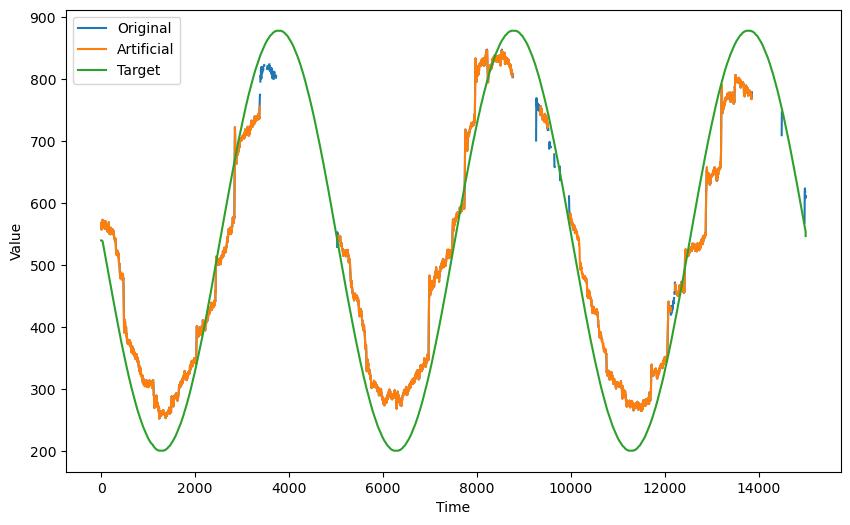

In [41]:
instance = 91
smoothpur = 1 # starts from 0
x_y_T = 1 # x= 0, Y= 1  Target =2
l_r = 1 # 0 = LEFT, 1 = RIGHT

plt.figure(figsize=(10, 6))
plt.plot(SmoothPur_11_12_Ar[instance][smoothpur][x_y_T][l_r], label='Original')
plt.plot(SmoothPur_11_12[instance][smoothpur][x_y_T][l_r], label='Artificial')
plt.plot(SmoothPur_11_12[instance][smoothpur][2][l_r], label='Target')

plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.savefig('HG032_v2_SPT_12.png')  # Saves as a PNG file
plt.show()

In [42]:
from scipy.io import loadmat

# Load .mat file
mat_file = loadmat('CaracterizacionBlink.mat')

# Print the keys to explore the data structure
print(mat_file.keys())

# Access a specific variable (assuming the file has a variable named 'data')
data = mat_file['CaracterizacionBlink']

print(data)


dict_keys(['__header__', '__version__', '__globals__', 'CaracterizacionBlink'])
[[[1.58696518e+02 5.11923456e+03 9.91738495e+03 6.73679103e+06]
  [1.59550562e+02 4.99197474e+03 9.91781197e+03 6.73615209e+06]]

 [[1.64248789e+02 9.69837316e+02 8.75922959e+03 1.15603209e+07]
  [1.62986322e+02 9.76266568e+02 8.73205458e+03 1.18463696e+07]]

 [[1.68970246e+02 6.14590424e+03 7.78171506e+03 2.18611693e+07]
  [1.69171720e+02 6.45664134e+03 7.80617499e+03 2.17144138e+07]]

 [[1.51684005e+02 5.36580609e+03 7.70565867e+03 9.39407596e+06]
  [1.49158357e+02 5.84663593e+03 7.55061529e+03 9.63487405e+06]]

 [[1.71717879e+02 2.40264806e+03 9.77805463e+03 7.89503860e+06]
  [1.71598619e+02 2.40826425e+03 9.78165475e+03 7.88173723e+06]]

 [[1.74456204e+02 2.39249458e+03 8.68776454e+03 8.36688014e+06]
  [1.71899287e+02 2.15873937e+03 8.68658670e+03 8.37216189e+06]]

 [[1.51016185e+02 2.09389743e+03 7.91018798e+03 1.06771383e+07]
  [1.50621148e+02 2.09026027e+03 7.90999046e+03 1.06785774e+07]]

 [[2.30185

In [43]:
data.shape

(12, 2, 4)

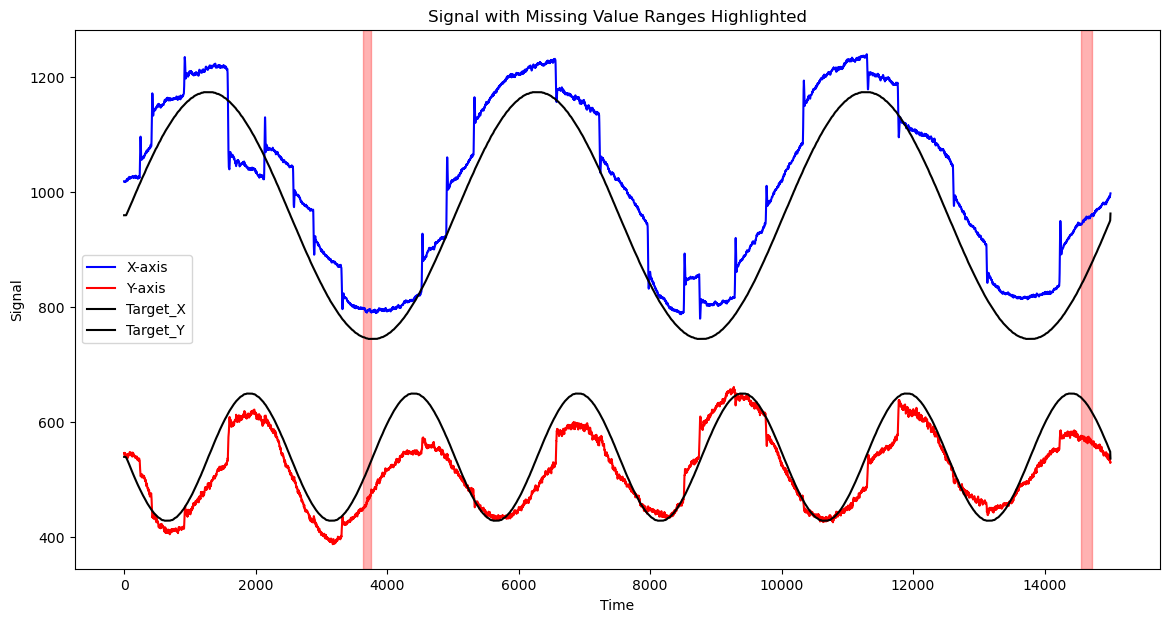

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the .dat files
eventL = pd.read_csv('Artificial_blinks/HG032/SmoothPur_9/REvent.dat', header=None, names=['start', 'end', 'value'])
sigL = pd.read_csv('Artificial_blinks/HG032/SmoothPur_9/RTS.dat', header=None, names=['X-axis', 'Y-axis'])
Target = pd.read_csv('Artificial_blinks/HG032/SmoothPur_9/target.dat', header=None, names=['X-axis', 'Y-axis'])

# Identify the ranges with missing values and modify the ranges
missing_ranges = eventL[eventL['value'] == 5].copy()
# missing_ranges['start'] -= 10
# missing_ranges['end'] += 10

# Plot the sigL data
plt.figure(figsize=(14, 7))
plt.plot(sigL['X-axis'], label='X-axis', color='blue')
plt.plot(sigL['Y-axis'], label='Y-axis', color='red')
plt.plot(Target['X-axis'], label='Target_X', color='black')
plt.plot(Target['Y-axis'], label='Target_Y', color='black')

# Highlight the missing ranges
for idx, row in missing_ranges.iterrows():
    plt.axvspan(row['start'], row['end'], color='red', alpha=0.3)

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('Signal')
plt.title('Signal with Missing Value Ranges Highlighted')
plt.legend()
plt.show()


In [ ]:
mean_y_11_12 = np.nanmean(SmoothPur_11_12)
std_y_11_12 = np.nanstd(SmoothPur_11_12)
SmoothPur_11_12_normalized = (SmoothPur_11_12 - mean_y_11_12) / std_y_11_12

In [ ]:
instance = 20
smoothpur = 0 # starts from 0
x_y_T = 0 # x= 0, Y= 1  Target =2
l_r = 0 # 0 = LEFT, 1 = RIGHT

plt.figure(figsize=(14, 7))
# plt.plot(SmoothPur_11_12_Ar[instance][smoothpur][x_y_T][l_r], label='Original')
plt.plot(SmoothPur_11_12_normalized[instance][smoothpur][x_y_T][l_r], label='Gaze', color='blue')
plt.plot(SmoothPur_11_12_normalized[instance][smoothpur][2][l_r], label='Target', color='black', linestyle = 'dotted')

eventL = pd.read_csv('Artificial_blinks/HF021/SmoothPur_11/LEvent.dat', header=None, names=['start', 'end', 'value'])
# Identify the ranges with missing values and modify the ranges
missing_ranges = eventL[eventL['value'] == 2].copy()

# Highlight the missing ranges
for idx, row in missing_ranges.iterrows():
    plt.axvspan(row['start'], row['end'], color='red', alpha=0.3) 
    
plt.title('HF021_v2, SPT11, X-axis, Left eye')
    
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.legend()
plt.savefig('figure1_2.svg', format='svg')
plt.show()